####Data Importing/Data Cleaning 

In [303]:
import pandas as pd
from pandas.util import hash_pandas_object

In [304]:
!gdown --id 17qdefxl0Lc5mFUPIwW8nNwin0W-sUKnW

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17qdefxl0Lc5mFUPIwW8nNwin0W-sUKnW
To: /content/Static_dataset.csv
100% 17.3M/17.3M [00:00<00:00, 271MB/s]


In [305]:
static_data = pd.read_csv("/content/Static_dataset.csv")
static_data.shape

(268074, 16)

In [306]:
static_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [307]:
null=static_data.isnull().sum()
null

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [308]:
total=static_data.isnull().sum().sort_values()
precent=(null / static_data.isnull().count()).sort_values(ascending=False)

In [309]:
missing=pd.concat([total,precent],axis=1,keys=['Total','Percent'])

In [310]:
missing.head(20)

,Total,Percent
timestamp,0,0.00000
FQDN_count,0,0.00000
subdomain_length,0,0.00000
upper,0,0.00000
lower,0,0.00000
numeric,0,0.00000
entropy,0,0.00000
special,0,0.00000
labels,0,0.00000
labels_max,0,0.00000


In [311]:
static_data.dropna()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


In [312]:
static_data.isnull().all().sum()

0

In [313]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [314]:
numerical_columns=static_data.select_dtypes(include=['float64','int64'])
numerical_columns.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1,1


In [315]:
string_columns=static_data.select_dtypes(include=['object'])
string_columns.head()

,timestamp,longest_word,sld
0,56:19.8,2,192
1,07:23.9,2,192
2,23:15.1,2,192
3,04:51.9,2,192
4,12:44.0,local,local


In [316]:
#transform the variables that contain string values, so that all of them can be used in the model.
static_data['timestamp']=hash_pandas_object(static_data['timestamp'])
static_data['sld']=hash_pandas_object(static_data['sld'])
static_data['longest_word']=hash_pandas_object(static_data['longest_word'])
static_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,13143242955146178578,27,10,0,10,11,2.570417,6,6,7,3.666667,12818595333635098865,1436061903013436886,14,1,1
1,2577386964918736430,27,10,0,10,11,2.767195,6,6,7,3.666667,17185745172638414508,16487103021445981531,14,1,1
2,219530798504705711,26,9,0,10,10,2.742338,6,6,7,3.500000,17979476933330425403,8782042356081258380,13,1,0
3,2202385798199089757,27,10,0,10,11,2.570417,6,6,7,3.666667,8625786489483146881,14213111700542671718,14,1,1
4,13599999059469247330,15,9,0,11,0,2.929439,4,3,5,4.333333,6933423371777200487,6933423371777200487,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,4635147120335315575,18,3,0,16,0,2.338623,2,3,10,5.333333,17593087732653107179,1074112825213617825,14,1,0
268070,694724741529077594,27,10,0,10,11,2.767195,6,6,7,3.666667,6543177446356295113,11629204487744685214,14,1,0
268071,13076708599487200848,27,10,0,10,11,2.767195,6,6,7,3.666667,1392224066739923824,11214114670944286487,14,1,1
268072,4906493388405613576,16,0,0,14,0,3.249687,2,2,13,7.500000,6819429491188426835,10122129679838215532,14,0,0


In [317]:
Final_Data=static_data.copy()
Final_Data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,13143242955146178578,27,10,0,10,11,2.570417,6,6,7,3.666667,12818595333635098865,1436061903013436886,14,1,1
1,2577386964918736430,27,10,0,10,11,2.767195,6,6,7,3.666667,17185745172638414508,16487103021445981531,14,1,1
2,219530798504705711,26,9,0,10,10,2.742338,6,6,7,3.500000,17979476933330425403,8782042356081258380,13,1,0
3,2202385798199089757,27,10,0,10,11,2.570417,6,6,7,3.666667,8625786489483146881,14213111700542671718,14,1,1
4,13599999059469247330,15,9,0,11,0,2.929439,4,3,5,4.333333,6933423371777200487,6933423371777200487,15,1,1


In [318]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  uint64 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268074 non-null  uint64 
 12  sld               268074 non-null  uint64 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

### Analysis


####Univarinte Analysis

In [319]:
import seaborn as sns

In [320]:
Final_Data['Target Attack'].describe()

count    268074.000000
mean          0.549024
std           0.497592
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Target Attack, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc6fa13d90>,
      dtype=object)

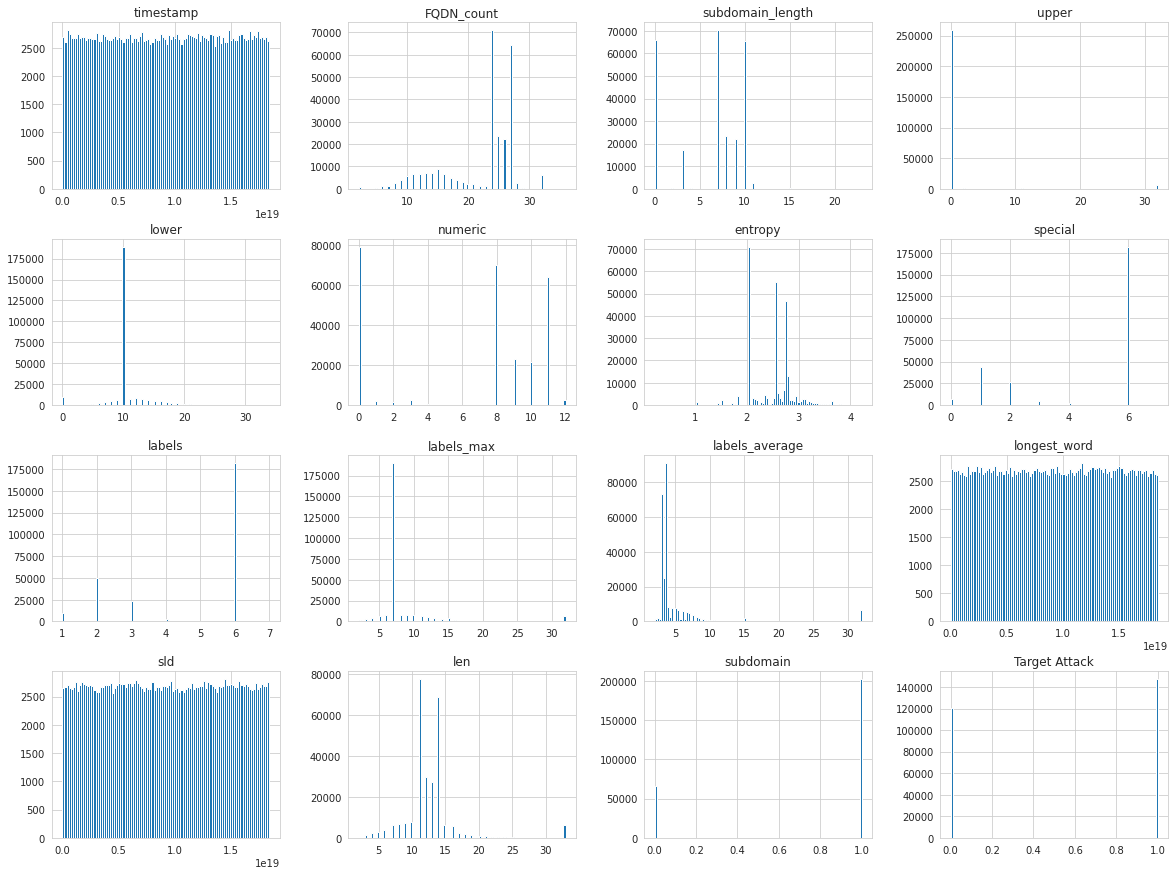

In [321]:
Final_Data.hist(bins=100, figsize=(20,15))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


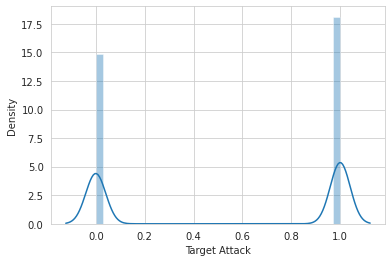

In [322]:
#histogram
sns.distplot(Final_Data['Target Attack'])

In [323]:
print("Skewness: %f" %Final_Data['Target Attack'].skew())
print("Kurtosis: %f" %Final_Data['Target Attack'].kurt())

Skewness: -0.197046
Kurtosis: -1.961188


In [324]:
skwed_lst=[]
kurtosis_lst=[]
column_names =["feature","Skewness","Kurtosis"]

In [325]:
for col in Final_Data.columns :
                skwed=Final_Data[col].skew()
                kurtosis=Final_Data[col].kurt()
                skwed_lst.append(skwed)
                kurtosis_lst.append(kurtosis)

In [326]:
df_sk= pd.DataFrame(skwed_lst)
df_kr=pd.DataFrame(kurtosis_lst)
df_cols = pd.DataFrame(Final_Data.columns)
dfx=pd.DataFrame(pd.concat([df_cols,df_sk,df_kr],axis=1))
dfx.columns=column_names
dfx

,feature,Skewness,Kurtosis
0,timestamp,-0.002505,-1.203005
1,FQDN_count,-1.101731,0.217343
2,subdomain_length,-0.590480,-1.097282
3,upper,5.988737,34.515593
4,lower,0.343449,6.618860
5,numeric,-0.594384,-1.383806
6,entropy,-0.140156,0.698231
7,special,-0.902972,-1.035347
8,labels,-0.903680,-1.011358
9,labels_max,3.979910,17.737842


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


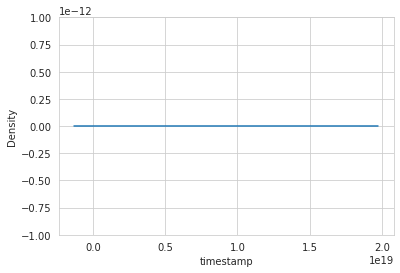

In [327]:
sns.distplot(Final_Data['timestamp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


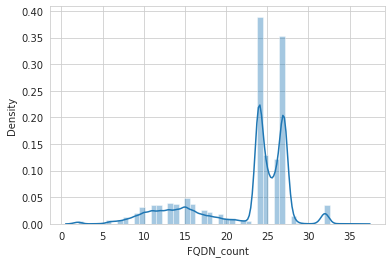

In [328]:
sns.distplot(Final_Data['FQDN_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


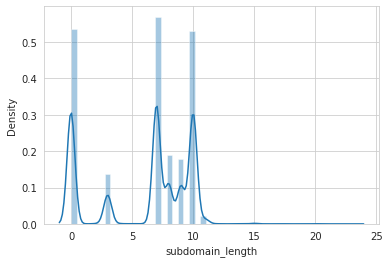

In [329]:
sns.distplot(Final_Data['subdomain_length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


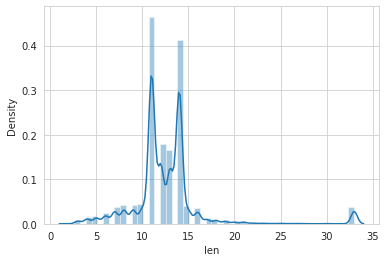

In [330]:
sns.distplot(Final_Data['len'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


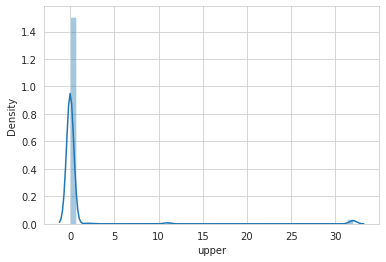

In [331]:
sns.distplot(Final_Data['upper'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


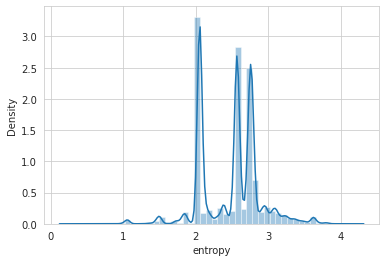

In [332]:
sns.distplot(Final_Data['entropy'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


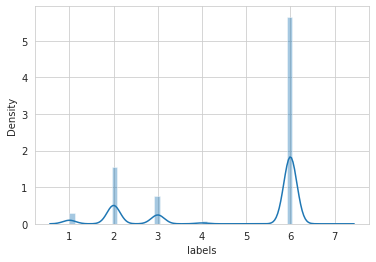

In [333]:
sns.distplot(Final_Data['labels'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


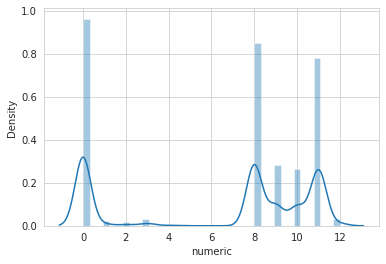

In [334]:
sns.distplot(Final_Data['numeric'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


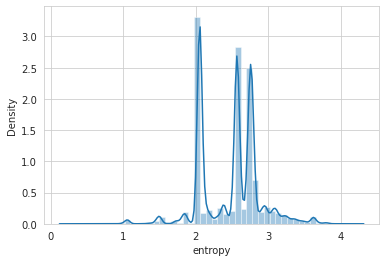

In [335]:
sns.distplot(Final_Data['entropy'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


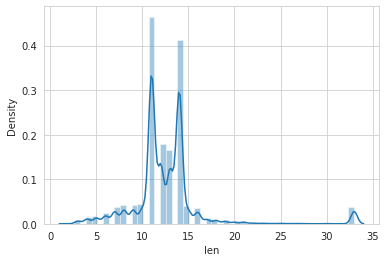

In [336]:
sns.distplot(Final_Data['len'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


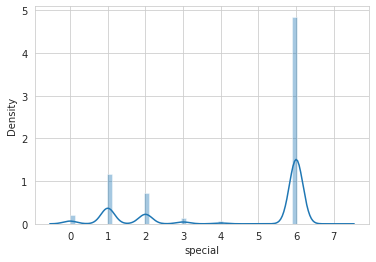

In [337]:
sns.distplot(Final_Data['special'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


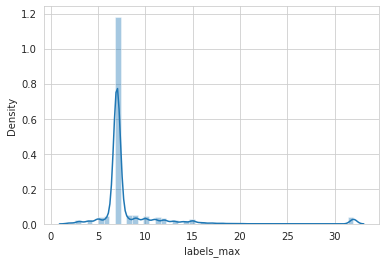

In [338]:
sns.distplot(Final_Data['labels_max'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


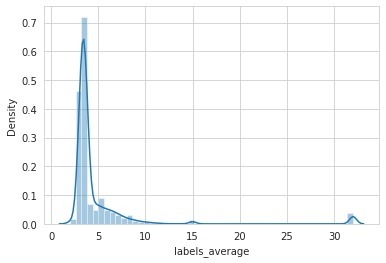

In [339]:
sns.distplot(Final_Data['labels_average'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


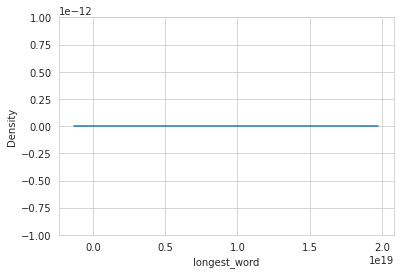

In [340]:
sns.distplot(Final_Data['longest_word'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


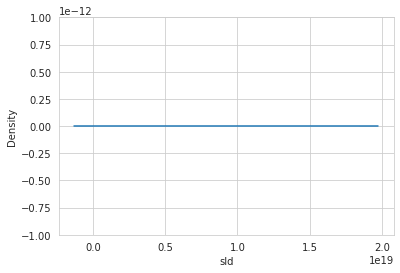

In [341]:
sns.distplot(Final_Data['sld'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


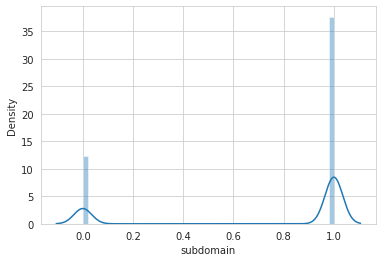

In [342]:
sns.distplot(Final_Data['subdomain'])

####Bivarinte Analysis

In [343]:
import matplotlib.pyplot as plt


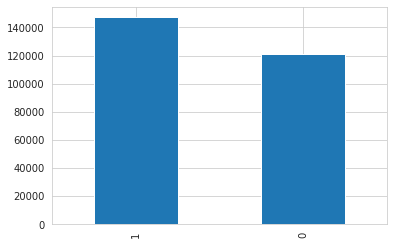

In [344]:
from locale import normalize
Final_Data['Target Attack'].value_counts().plot.bar()
plt.show()

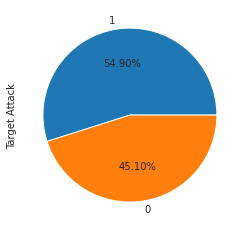

In [345]:
from locale import normalize
Final_Data['Target Attack'].value_counts().plot.pie(labels=Final_Data['Target Attack'].unique(),autopct = '%1.2f%%')
plt.show()

In [346]:
Final_Data.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')

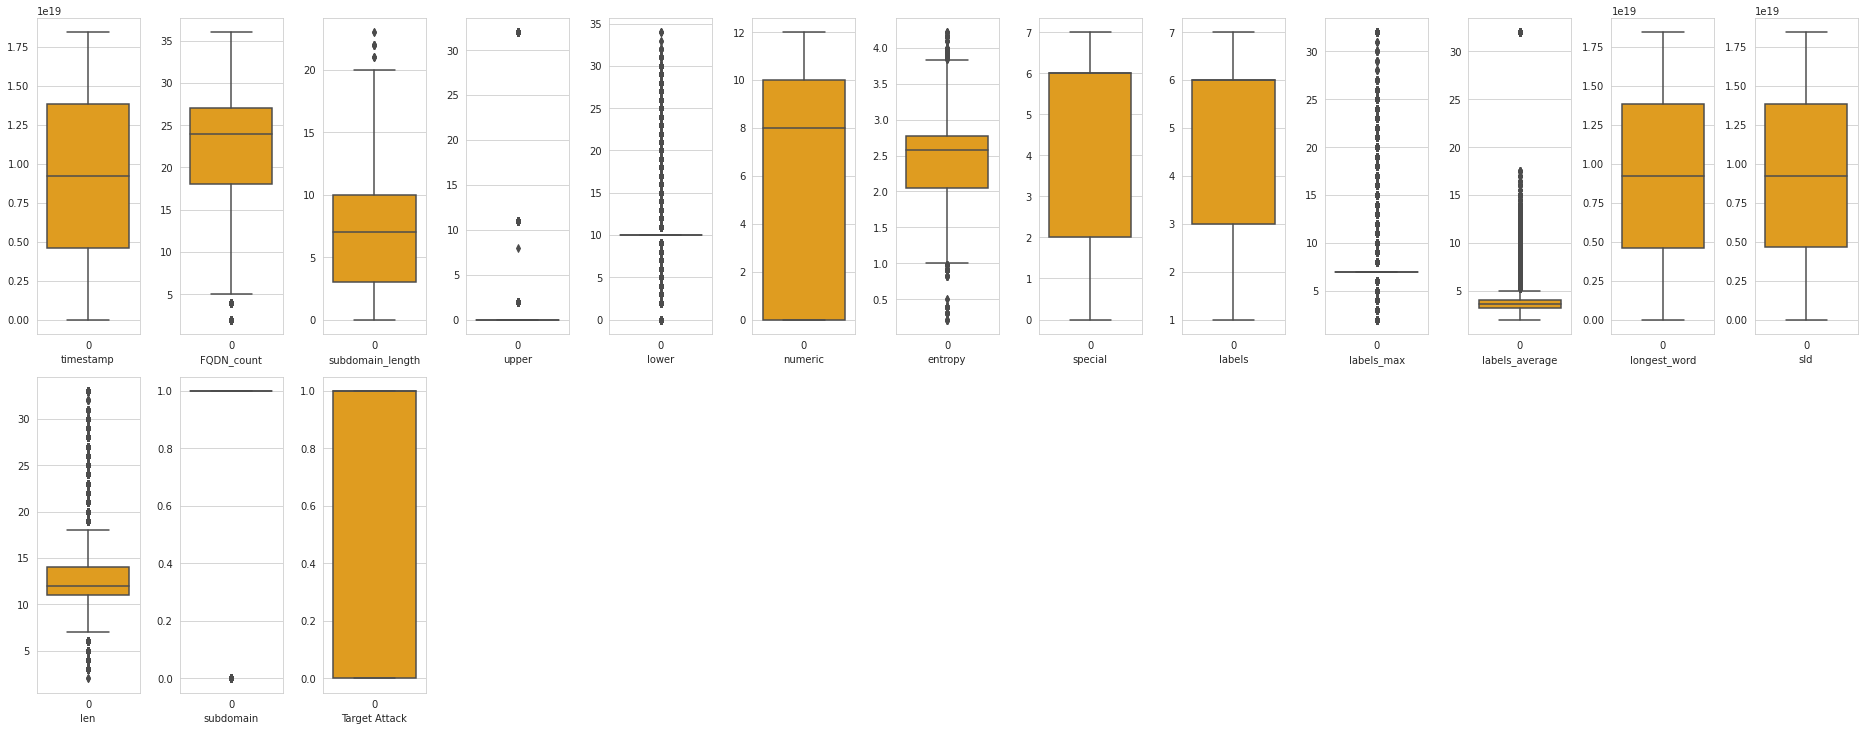

In [347]:
l = Final_Data.columns.values
num_cols=13
num_rows = len(l)-1/num_cols
plt.figure(figsize=(num_cols * 2, 5*num_rows))
for i in range(0,len(l)):
    plt.subplot(num_rows + 1, num_cols, i+1)
    sns.set_style('whitegrid')
    ax=sns.boxplot(data=Final_Data[l[i]], color='orange', orient='v')
    ax.set_xlabel(Final_Data.columns[i])
    plt.tight_layout()


###Data Split

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [349]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [350]:
Final_Data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,13143242955146178578,27,10,0,10,11,2.570417,6,6,7,3.666667,12818595333635098865,1436061903013436886,14,1,1
1,2577386964918736430,27,10,0,10,11,2.767195,6,6,7,3.666667,17185745172638414508,16487103021445981531,14,1,1
2,219530798504705711,26,9,0,10,10,2.742338,6,6,7,3.500000,17979476933330425403,8782042356081258380,13,1,0
3,2202385798199089757,27,10,0,10,11,2.570417,6,6,7,3.666667,8625786489483146881,14213111700542671718,14,1,1
4,13599999059469247330,15,9,0,11,0,2.929439,4,3,5,4.333333,6933423371777200487,6933423371777200487,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,4635147120335315575,18,3,0,16,0,2.338623,2,3,10,5.333333,17593087732653107179,1074112825213617825,14,1,0
268070,694724741529077594,27,10,0,10,11,2.767195,6,6,7,3.666667,6543177446356295113,11629204487744685214,14,1,0
268071,13076708599487200848,27,10,0,10,11,2.767195,6,6,7,3.666667,1392224066739923824,11214114670944286487,14,1,1
268072,4906493388405613576,16,0,0,14,0,3.249687,2,2,13,7.500000,6819429491188426835,10122129679838215532,14,0,0


In [351]:
X=Final_Data.drop('Target Attack',axis=1)
Y=Final_Data.iloc[:,-1]

In [352]:
#split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0,shuffle=True)

In [353]:
#split the training into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0,shuffle=True)

In [354]:
# splitter=StratifiedShuffleSplit(n_splits=2,random_state=1) 

# for train,test in splitter.split(X,Y):     
#     X_train = X.iloc[train]
#     y_train = Y.iloc[train]
#     x_test = X.iloc[test]
#     y_test= Y.iloc[test]
# print(y_train.value_counts())  
# print(y_test.value_counts())

In [355]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

1    88424
0    72420
Name: Target Attack, dtype: int64
1    29514
0    24101
Name: Target Attack, dtype: int64
1    29241
0    24374
Name: Target Attack, dtype: int64


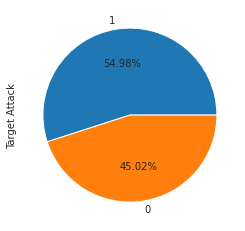

In [356]:
y_train.value_counts().plot.pie(labels=y_train.unique(),autopct = '%1.2f%%')
plt.show()

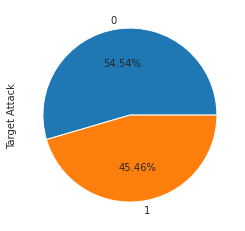

In [357]:
y_test.value_counts().plot.pie(labels=y_test.unique(),autopct = '%1.2f%%')
plt.show()

###Normalization using Standard Scaler

In [56]:
#Normalization using Zscore
ss_scaler = StandardScaler()

X_Train = ss_scaler.fit_transform(X_train)
X_val = ss_scaler.fit_transform(X_val)
X_Test = ss_scaler.transform(X_test)
X_Train

array([[ 0.70072746, -1.21380754, -1.55355549, ..., -1.22546163,
         0.81917017, -1.74872183],
       [-0.98574373, -2.21369483, -1.55355549, ..., -1.23130753,
        -1.3342213 , -1.74872183],
       [-1.37275835, -2.5469906 , -1.55355549, ...,  1.32645028,
        -1.81275273, -1.74872183],
       ...,
       [ 1.03455181,  0.78596705,  1.01178248, ...,  0.48801918,
         0.34063873,  0.57184624],
       [ 0.06664474,  0.2860234 ,  0.24218108, ..., -1.46659592,
        -0.37715842,  0.57184624],
       [ 0.32631711, -1.38045542, -0.7839541 , ..., -0.79379752,
        -0.61642414,  0.57184624]])

###Feature Selection and Training 

#####1- Annova Selector

In [57]:
# def AnovaSelector(xval,yval,i):
#   Anova_Select = SelectKBest(score_func=f_classif, k=i).fit(xval, yval)
#   X_train_anova = Anova_Select.transform(xval)
#   X_test_anova = Anova_Select.transform(yval)
#   return X_train_anova,X_test_anova


In [58]:
Anova_Selector = SelectKBest(score_func=f_classif, k="all").fit(X_val, y_val)

In [59]:
df_Anovascores = pd.DataFrame(Anova_Selector.scores_)
df_Anovacolumns = pd.DataFrame(X.columns)

#concat two dataframes to view all scores of features
Anova_Scores = pd.concat([df_Anovacolumns,df_Anovascores],axis=1)
Anova_Scores.columns = ['feature','Anova_Score']  
Anova_Scores.sort_values(by=['Anova_Score'],ascending=False)

,feature,Anova_Score
5,numeric,29584.006044
7,special,27278.596167
2,subdomain_length,25814.136392
8,labels,25580.195119
1,FQDN_count,24871.187204
14,subdomain,18038.790839
4,lower,4871.490056
13,len,1431.436444
6,entropy,733.709555
9,labels_max,478.435877


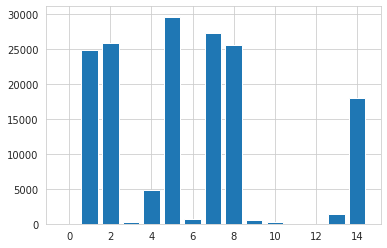

In [60]:
# plot the scores
plt.bar([i for i in range(len(Anova_Selector.scores_))], Anova_Selector.scores_)
plt.show()

#####Search for best features using Anova 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


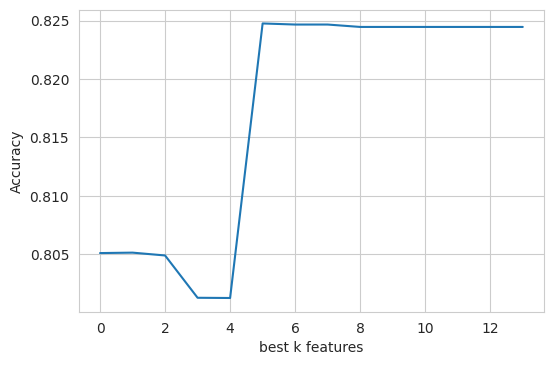

In [61]:
import sklearn.metrics as metrics
acc_anova = []
ktiem=[]
for i in range(2, 16):
    select = SelectKBest(score_func=f_classif, k=i)
    select.fit(X_val,y_val)
    X_val_anova = select.transform(X_val)
    X_test_anova = select.transform(X_Test)
    lr = LogisticRegression()
    lr.fit(X_val_anova, y_val)
    y_pred = lr.predict(X_test_anova)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_anova.append(acc)
    ktiem.append(i)

fig, axe = plt.subplots(dpi = 100)
axe.plot( acc_anova)
axe.set_xlabel("best k features")
axe.set_ylabel("Accuracy")
plt.show()

In [62]:
dic_anova = {
    'K_feature': ktiem,
    'Accuracy': acc_anova 
    }
anova_accuracies = pd.DataFrame.from_dict(dic_anova)

In [63]:
anova_accuracies.sort_values(by=['Accuracy'],ascending=False)

,K_feature,Accuracy
5,7,0.824751
6,8,0.824657
7,9,0.824657
8,10,0.824452
9,11,0.824452
10,12,0.824452
11,13,0.824452
12,14,0.824452
13,15,0.824452
1,3,0.805148


In [64]:
best_features = anova_accuracies.loc[anova_accuracies['Accuracy'] == anova_accuracies.Accuracy.max(), 'K_feature'].iat[0]
best_features

7

In [65]:
Anova_Select = SelectKBest(score_func=f_classif, k=best_features).fit(X_val, y_val)
selected_Anovafeatures = Anova_Select.get_support(indices=True)
selected_Anovafeatures

array([ 1,  2,  4,  5,  7,  8, 14])

In [66]:
selected_Xtrain = X[X.columns[selected_Anovafeatures]]
selected_Xtest = X[X.columns[selected_Anovafeatures]]
selected_Xtrain

,FQDN_count,subdomain_length,lower,numeric,special,labels,subdomain
0,27,10,10,11,6,6,1
1,27,10,10,11,6,6,1
2,26,9,10,10,6,6,1
3,27,10,10,11,6,6,1
4,15,9,11,0,4,3,1
...,...,...,...,...,...,...,...
268069,18,3,16,0,2,3,1
268070,27,10,10,11,6,6,1
268071,27,10,10,11,6,6,1
268072,16,0,14,0,2,2,0


In [67]:
select = SelectKBest(score_func=f_classif, k=best_features)
select.fit(X_Train,y_train)
X_train_anova = select.transform(X_Train)
X_test_anova = select.transform(X_Test)
X_train_anova

array([[-1.21380754, -1.55355549, -3.24334248, ..., -1.61464739,
        -2.10043703, -1.74872183],
       [-2.21369483, -1.55355549, -0.751698  , ..., -1.61464739,
        -1.5459366 , -1.74872183],
       [-2.5469906 , -1.55355549, -1.37460912, ..., -1.61464739,
        -1.5459366 , -1.74872183],
       ...,
       [ 0.78596705,  1.01178248, -0.12878689, ...,  0.6707476 ,
         0.67206511,  0.57184624],
       [ 0.2860234 ,  0.24218108, -0.12878689, ...,  0.6707476 ,
         0.67206511,  0.57184624],
       [-1.38045542, -0.7839541 , -0.12878689, ..., -1.15756839,
        -0.99143617,  0.57184624]])

#####Training

In [68]:
Accuracy={}
Precision={}
Recall={}
F1_score={}
models = []

In [69]:
#Area under Curve  to evaluate the quality of a binary classification model
#by measuring the area as much the model closer to the ideal model will be great model 
def ROC_curve(ytest,ypred):
  FPR, TPR, _ = metrics.roc_curve(ytest,  ypred)
  auc = metrics.roc_auc_score(ytest, ypred)
  #create ROC curve
  plt.plot(FPR,TPR,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc=4)
  plt.show()


######1- Logistic Regression 

In [70]:
LR_model = LogisticRegression()
LR_model.fit(X_train_anova, y_train)
LR_y_pred = LR_model.predict(X_test_anova)

In [71]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {LR_model.score(X_train_anova, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {LR_model.score(X_test_anova, y_test)*100} %')

Training Accuracy	: 82.20573972296138 %
Testing Accuracy	:  82.47505362305326 %


In [72]:
print(classification_report(y_test, LR_y_pred)) #get the evalutions matrices for  LR

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     24203
           1       0.76      0.99      0.86     29412

    accuracy                           0.82     53615
   macro avg       0.87      0.81      0.81     53615
weighted avg       0.86      0.82      0.82     53615



In [73]:
Accuracy['LogisticRegression']=accuracy_score(y_test,LR_y_pred)
Precision['LogisticRegression']=precision_score(y_test,LR_y_pred)
Recall['LogisticRegression']=recall_score(y_test,LR_y_pred)
F1_score['LogisticRegression']=f1_score(y_test,LR_y_pred)
models.append(LR_model)

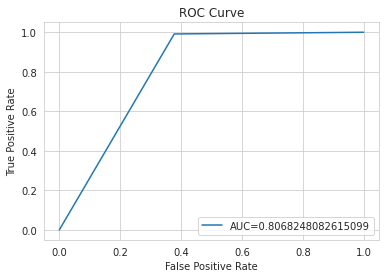

In [74]:
ROC_curve(y_test,LR_y_pred) #Area under Curve  to evaluate the quality of LR model AUC=80.68

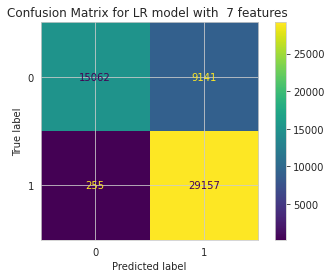

In [75]:
LR_cm = confusion_matrix(y_test, LR_y_pred)
display = ConfusionMatrixDisplay(LR_cm).plot()
plt.title(f"Confusion Matrix for LR model with  {best_features} features ")
plt.show()

######2- Decision Tree

In [76]:
DT_model =  DecisionTreeClassifier()
DT_model.fit(X_train_anova, y_train)
DT_y_pred = DT_model.predict(X_test_anova)

In [77]:

#Scoring the model on training_data
print(f'Training Accuracy\t: {DT_model.score(X_train_anova, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {DT_model.score(X_test_anova, y_test)*100} %')

Training Accuracy	: 82.54582079530476 %
Testing Accuracy	:  82.79958966707078 %


In [78]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24203
           1       0.76      1.00      0.86     29412

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [79]:
Accuracy['DecisionTree']=accuracy_score(y_test,DT_y_pred)
Precision['DecisionTree']=precision_score(y_test,DT_y_pred)
Recall['DecisionTree']=recall_score(y_test,DT_y_pred)
F1_score['DecisionTree']=f1_score(y_test,DT_y_pred)
models.append(DT_model)

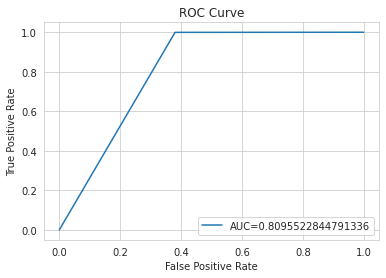

In [80]:
ROC_curve(y_test,DT_y_pred)#Area under Curve  to evaluate the quality of DT model AUC=80.95

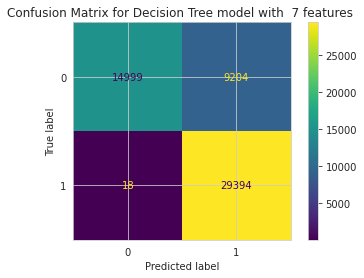

In [81]:
DT_cm = confusion_matrix(y_test, DT_y_pred)
display = ConfusionMatrixDisplay(DT_cm).plot()
plt.title(f"Confusion Matrix for Decision Tree model with  {best_features} features ")
plt.show()

######3- GaussianNB

In [82]:
NB_model = GaussianNB()
NB_model.fit(X_train_anova, y_train)
NB_y_pred = NB_model.predict(X_test_anova)

In [83]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {NB_model.score(X_train_anova, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {NB_model.score(X_test_anova, y_test)*100:.3f} %')

Training Accuracy	: 80.294 %
Testing Accuracy	:  80.522 %


In [84]:
print(classification_report(y_test, NB_y_pred))#Area under Curve  to evaluate the quality of GaussianNB model AUC=79.08

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     24203
           1       0.76      0.94      0.84     29412

    accuracy                           0.81     53615
   macro avg       0.83      0.79      0.79     53615
weighted avg       0.82      0.81      0.80     53615



In [85]:
Accuracy['GaussianNB']=accuracy_score(y_test,NB_y_pred)
Precision['GaussianNB']=precision_score(y_test,NB_y_pred)
Recall['GaussianNB']=recall_score(y_test,NB_y_pred)
F1_score['GaussianNB']=f1_score(y_test,NB_y_pred)
models.append(DT_model)

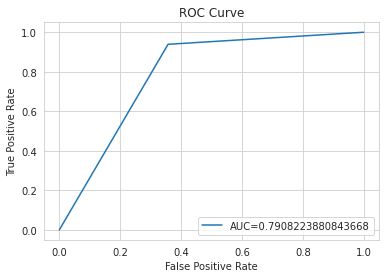

In [86]:
ROC_curve(y_test,NB_y_pred)

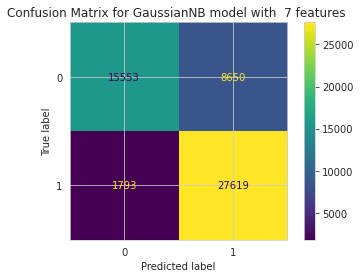

In [87]:
NB_cm = confusion_matrix(y_test, NB_y_pred)
display = ConfusionMatrixDisplay(NB_cm).plot()
plt.title(f"Confusion Matrix for GaussianNB model with  {best_features} features ")
plt.show()

#####2- Mutual Info Selector

In [88]:
# from sklearn.feature_selection import mutual_info_classif
# def mutualSelector(xval,yval,xtrain,xtest,i):
#     mutual_Selector = SelectKBest(score_func=mutual_info_classif, k=i).fit(xval, yval)
#     X_train_fs = pd.DataFrame(mutual_Selector.transform(xtrain), columns = xtrain.columns[mutual_Selector.get_support()])
#     X_test_fs = pd.DataFrame(mutual_Selector.transform(xtest), columns = xtest.columns[mutual_Selector.get_support()])
#     return X_train_fs,X_test_fs


In [89]:
mutual_Selector = SelectKBest(score_func=mutual_info_classif, k='all').fit(X_val, y_val)

In [90]:
df_mutualscores = pd.DataFrame(mutual_Selector.scores_)
df_mutualcolumns = pd.DataFrame(X.columns)

#concat two dataframes to view all scores of features
mutual_Score = pd.concat([df_mutualcolumns,df_mutualscores],axis=1)
mutual_Score.columns = ['feature','mutual_Score']  
mutual_Score.sort_values(by=['mutual_Score'],ascending=False)

,feature,mutual_Score
8,labels,0.270156
7,special,0.269376
6,entropy,0.259720
1,FQDN_count,0.253073
10,labels_average,0.238750
4,lower,0.231386
9,labels_max,0.221362
2,subdomain_length,0.219513
5,numeric,0.215997
13,len,0.156607


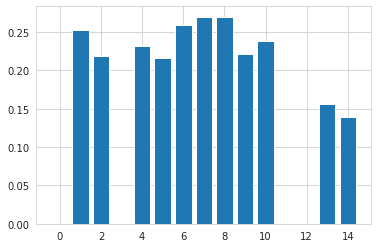

In [91]:
# plot the scores
plt.bar([i for i in range(len(mutual_Selector.scores_))], mutual_Selector.scores_)
plt.show()

#####Search for best features using mutual Inforamtion

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


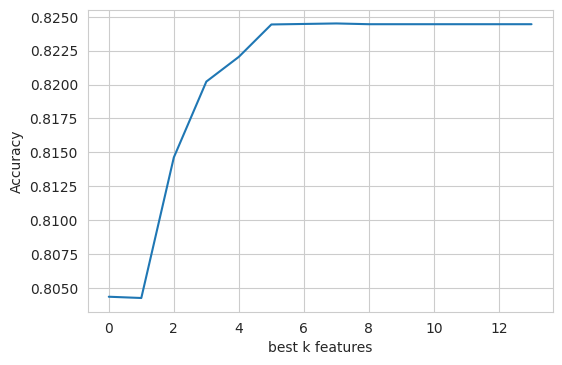

In [92]:
import sklearn.metrics as metrics
mutual_acc = []
k_mutual=[]
for i in range(2, 16):
    select = SelectKBest(score_func=mutual_info_classif, k=i)
    select.fit(X_val,y_val)
    X_val_mutual = select.transform(X_val)
    X_test_mutual = select.transform(X_Test)

    lr = LogisticRegression()
    lr.fit(X_val_mutual, y_val)
    y_pred_ = lr.predict(X_test_mutual)
    f1 = metrics.accuracy_score(y_test, y_pred_)
    mutual_acc.append(f1)
    k_mutual.append(i)

fig, axe = plt.subplots(dpi = 100)
axe.plot(mutual_acc)
axe.set_xlabel("best k features")
axe.set_ylabel("Accuracy")
plt.show()

In [93]:
dic_mutual = {
    'K_feature': k_mutual,
    'Accuracy': mutual_acc 
    }
mutual_accuracies = pd.DataFrame.from_dict(dic_mutual)

In [94]:
mutual_accuracies.sort_values(by=['Accuracy'],ascending=False)

,K_feature,Accuracy
7,9,0.824508
6,8,0.824471
8,10,0.824452
9,11,0.824452
10,12,0.824452
11,13,0.824452
12,14,0.824452
13,15,0.824452
5,7,0.824433
4,6,0.822046


In [95]:
mutual_best_features = mutual_accuracies.loc[mutual_accuracies['Accuracy'] == mutual_accuracies.Accuracy.max(), 'K_feature'].iat[0]
mutual_best_features

9

In [96]:
mutual_Select = SelectKBest(score_func=mutual_info_classif, k=mutual_best_features).fit(X_val, y_val)
selected_mutuLfeatures = mutual_Select.get_support(indices=True)
selected_mutuLfeatures

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10])

In [97]:
selected_Xtrain2 = X[X.columns[selected_mutuLfeatures]]
selected_Xtest2 = X[X.columns[selected_mutuLfeatures]]
selected_Xtrain2

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average
0,27,10,10,11,2.570417,6,6,7,3.666667
1,27,10,10,11,2.767195,6,6,7,3.666667
2,26,9,10,10,2.742338,6,6,7,3.500000
3,27,10,10,11,2.570417,6,6,7,3.666667
4,15,9,11,0,2.929439,4,3,5,4.333333
...,...,...,...,...,...,...,...,...,...
268069,18,3,16,0,2.338623,2,3,10,5.333333
268070,27,10,10,11,2.767195,6,6,7,3.666667
268071,27,10,10,11,2.767195,6,6,7,3.666667
268072,16,0,14,0,3.249687,2,2,13,7.500000


In [98]:
select_mutual = SelectKBest(score_func=mutual_info_classif, k=mutual_best_features)
select_mutual.fit(X_Train,y_train)
X_train_mutual = select_mutual.transform(X_Train)
X_test_mutual = select_mutual.transform(X_Test)
X_train_mutual

array([[-1.21380754, -1.55355549, -3.24334248, ..., -2.10043703,
         1.52691749,  2.22992927],
       [-2.21369483, -1.55355549, -0.751698  , ..., -1.5459366 ,
        -0.50986923, -0.17554176],
       [-2.5469906 , -1.55355549, -1.37460912, ..., -1.5459366 ,
        -0.9624885 , -0.39422095],
       ...,
       [ 0.78596705,  1.01178248, -0.12878689, ...,  0.67206511,
        -0.2835596 , -0.24843483],
       [ 0.2860234 ,  0.24218108, -0.12878689, ...,  0.67206511,
        -0.2835596 , -0.35777442],
       [-1.38045542, -0.7839541 , -0.12878689, ..., -0.99143617,
        -0.50986923, -0.17554176]])

#####Training

######1- Logistic Regression 

In [99]:
LR_model_ = LogisticRegression()
LR_model_.fit(X_train_mutual, y_train)
LR_y_pred2 = LR_model_.predict(X_test_mutual)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [100]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {LR_model_.score(X_train_mutual, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {LR_model_.score(X_test_mutual, y_test)*100} %')

Training Accuracy	: 82.39225585038919 %
Testing Accuracy	:  82.67462463862725 %


In [101]:
print(classification_report(y_test, LR_y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     24203
           1       0.76      1.00      0.86     29412

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [102]:
Accuracy['LogisticRegression_mutual']=accuracy_score(y_test,LR_y_pred2)
Precision['LogisticRegression_mutual']=precision_score(y_test,LR_y_pred2)
Recall['LogisticRegression_mutual']=recall_score(y_test,LR_y_pred2)
F1_score['LogisticRegression_mutual']=f1_score(y_test,LR_y_pred2)
models.append(LR_model_)

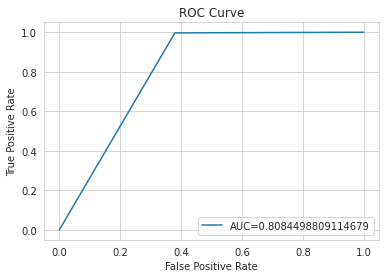

In [103]:
ROC_curve(y_test,LR_y_pred2)#Area under Curve  to evaluate the quality of LR model, AUC=80.69

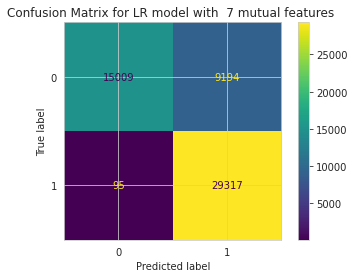

In [104]:
LR_cm_ = confusion_matrix(y_test, LR_y_pred2)
display = ConfusionMatrixDisplay(LR_cm_).plot()
plt.title(f"Confusion Matrix for LR model with  {best_features} mutual features ")
plt.show()

######2- Decision Tree

In [105]:
DT_model_ =  DecisionTreeClassifier()
DT_model_.fit(X_train_mutual, y_train)
DT_y_pred2 = DT_model_.predict(X_test_mutual)

In [106]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {DT_model_.score(X_train_mutual, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {DT_model_.score(X_test_mutual, y_test)*100} %')

Training Accuracy	: 82.58747606376365 %
Testing Accuracy	:  82.80705026578383 %


In [107]:
print(classification_report(y_test, DT_y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24203
           1       0.76      1.00      0.86     29412

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [108]:
Accuracy['DecisionTree_mutual']=accuracy_score(y_test,DT_y_pred2)
Precision['DecisionTree_mutual']=precision_score(y_test,DT_y_pred2)
Recall['DecisionTree_mutual']=recall_score(y_test,DT_y_pred2)
F1_score['DecisionTree_mutual']=f1_score(y_test,DT_y_pred2)
models.append(DT_model_)

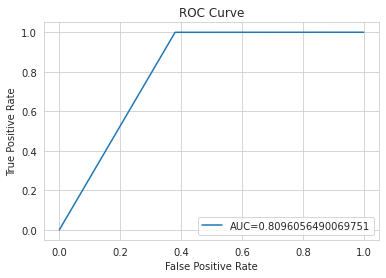

In [109]:
ROC_curve(y_test,DT_y_pred2)#Area under Curve  to evaluate the quality of DT model, AUC=80.96

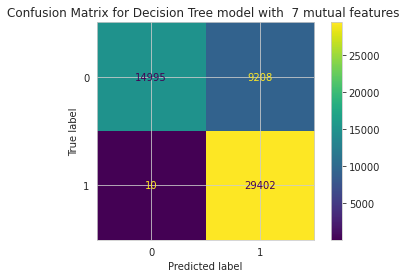

In [110]:
DT_cm_= confusion_matrix(y_test, DT_y_pred2)
display = ConfusionMatrixDisplay(DT_cm_).plot()
plt.title(f"Confusion Matrix for Decision Tree model with  {best_features} mutual features ")
plt.show()

######3- GaussianNB

In [111]:
NB_model_ = GaussianNB()
NB_model_.fit(X_train_mutual, y_train)
NB_y_pred2 = NB_model_.predict(X_test_mutual)

In [112]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {NB_model_.score(X_train_mutual, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {NB_model_.score(X_test_mutual, y_test)*100:.3f} %')

Training Accuracy	: 80.294 %
Testing Accuracy	:  80.522 %


In [113]:
print(classification_report(y_test, NB_y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     24203
           1       0.76      0.94      0.84     29412

    accuracy                           0.81     53615
   macro avg       0.83      0.79      0.79     53615
weighted avg       0.82      0.81      0.80     53615



In [114]:
Accuracy['GaussianNB_mutual']=accuracy_score(y_test,NB_y_pred2)
Precision['GaussianNB_mutual']=precision_score(y_test,NB_y_pred2)
Recall['GaussianNB_mutual']=recall_score(y_test,NB_y_pred2)
F1_score['GaussianNB_mutual']=f1_score(y_test,NB_y_pred2)
models.append(NB_model_)

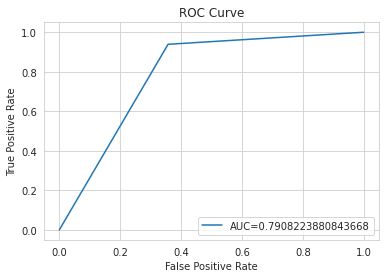

In [115]:
ROC_curve(y_test,NB_y_pred2) #Area under Curve  to evaluate the quality of GaussianNB model, AUC=79.08

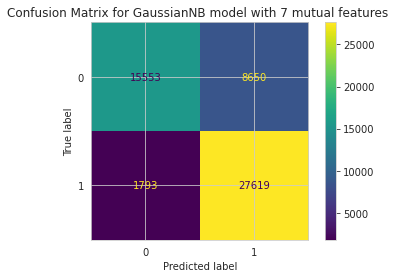

In [116]:
NB_cm_ = confusion_matrix(y_test, NB_y_pred2)
display = ConfusionMatrixDisplay(NB_cm_).plot()
plt.title(f"Confusion Matrix for GaussianNB model with {best_features} mutual features ")
plt.show()

###Evalution


In [117]:
from sklearn.pipeline import Pipeline

In [118]:
df_model = pd.DataFrame(index=['LogisticRegression','DecisionTree','GaussianNB','LogisticRegression_mutual','DecisionTree_mutual','GaussianNB_mutual'],
                        columns=['Accuracy', 'Precision', 'Recall','F1_Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1_Score'] = F1_score.values()

df_model


,Accuracy,Precision,Recall,F1_Score
LogisticRegression,0.824751,0.761319,0.991330,0.861232
DecisionTree,0.827996,0.761542,0.999388,0.864402
GaussianNB,0.805222,0.761504,0.939038,0.841004
LogisticRegression_mutual,0.826746,0.761263,0.996770,0.863242
DecisionTree_mutual,0.828071,0.761513,0.999660,0.864485
GaussianNB_mutual,0.805222,0.761504,0.939038,0.841004


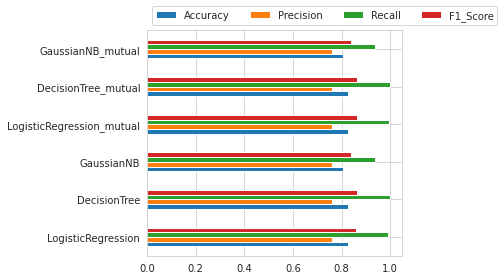

In [119]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(['LogisticRegression','DecisionTree','GaussianNB','LogisticRegression_mutual','DecisionTree_mutual','GaussianNB_mutual']), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

**The Champoin Model is Decision Tree with the 7 features from Mutual Info feature Selection by 82.8071% accuarcy and 76.1513% Percision**

In [120]:
DT_model_

DecisionTreeClassifier()

In [121]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT_model_, X_train_mutual, y_train, cv=10,scoring='f1_macro') # using cross validation to get the scores for Decision tree with cv=10

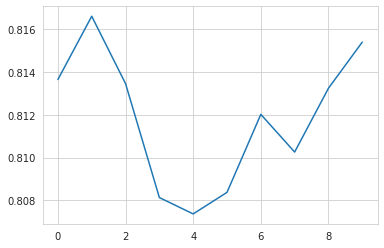

In [122]:
plt.plot(scores)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Name model: LogisticRegression() , Mean score: 0.8239163203409021
Name model: DecisionTreeClassifier() , Mean score: 0.8257068725374562
Name model: DecisionTreeClassifier() , Mean score: 0.8257068725374562


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Name model: LogisticRegression() , Mean score: 0.8239163203409021
Name model: DecisionTreeClassifier() , Mean score: 0.8257006551785903
Name model: GaussianNB() , Mean score: 0.8029394447413436


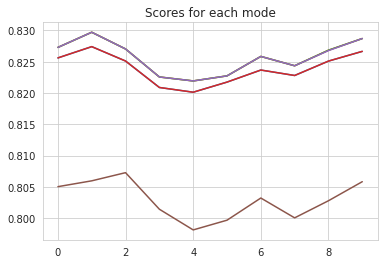

In [136]:
for model in models:
   scores = cross_val_score(model, X_train_mutual, y_train, cv=10)
   print(f'Name model: {model} , Mean score: {scores.mean()}')
   plt.plot(scores)
plt.title("Scores for each mode")
plt.show()
   

###Save The Model

In [370]:
X_train

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
181138,717743590956778843,26,9,0,10,10,2.742338,6,6,7,3.500000,8656844338446689492,5981348029632058739,13,1
221616,8177971519454390348,28,11,0,10,12,2.205789,6,6,7,3.833333,7075620276729169720,7175534861040945639,15,1
130041,3686817133368639931,24,7,0,10,8,2.054029,6,6,7,3.166667,1533702890183340262,9291266416121483272,11,1
57112,15080364797328152756,27,10,0,10,11,2.767195,6,6,7,3.666667,7971744324927863403,1118267013086303164,14,1
26003,10683947517403906773,19,0,0,18,0,3.500000,1,2,15,9.000000,5726598978454230980,3406248683195984403,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167509,6892370840658733330,14,0,0,12,0,2.781301,2,2,10,6.500000,500532401386726390,5356702195607784385,11,0
96884,13100251465374494314,28,11,0,10,12,2.205789,6,6,7,3.833333,11422896238699132733,5925830649515465298,15,1
227906,18387849465094958421,27,10,0,10,11,2.570417,6,6,7,3.666667,2742649845106729672,893542483612096607,14,1
228682,10653160115466795531,25,8,0,10,9,2.556642,6,6,7,3.333333,12882153860806879487,7067205551726611304,12,1


In [371]:
model = pipeline_model = Pipeline(steps=[("scaler", StandardScaler()), ("mutual", SelectKBest(score_func=mutual_info_classif, k=9)), ("Decision Tree",  DecisionTreeClassifier())])
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mutual',
                 SelectKBest(k=9,
                             score_func=<function mutual_info_classif at 0x7fcc8214acb0>)),
                ('Decision Tree', DecisionTreeClassifier())])

In [372]:
pred=model.predict(X_test)

In [373]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24374
           1       0.76      1.00      0.86     29241

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



In [375]:
import pickle
# save the model to disk
with open("Statical_model.pkl","wb") as file:
   pickle.dump(model,file=file)